In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [20]:
df = pd.read_csv("../datasets/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
species = df['Species'].unique()
colors = ['r','g','b']

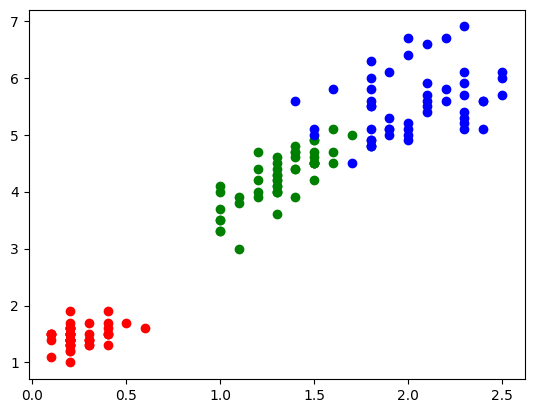

In [43]:
for species, color in zip(species, colors):
    subset = df[df['Species']== species]
    plt.scatter(subset["PetalWidthCm"], subset["PetalLengthCm"],label=species, color=color)

In [45]:
label_encoder = LabelEncoder()

df["Species_encoded"] = label_encoder.fit_transform(df['Species'])
X = df[["PetalWidthCm", "PetalLengthCm"]]
y = df["Species_encoded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=45)
model = svm.SVC(kernel='rbf', C=1.0, gamma='auto')  
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


y_test.shape

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        24
Iris-versicolor       0.89      1.00      0.94        17
 Iris-virginica       1.00      0.89      0.94        19

       accuracy                           0.97        60
      macro avg       0.96      0.96      0.96        60
   weighted avg       0.97      0.97      0.97        60



(60,)

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[29  0  0]
 [ 0 23  0]
 [ 0  2 21]]
